<a href="https://colab.research.google.com/github/maiscelo/Data-science-projects/blob/master/Boston%20price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#import sympy
import statistics 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns 
dataset_pd=pd.read_csv('Data_for_UCI_named.csv')
dataset=pd.read_csv('Data_for_UCI_named.csv')
dataset=dataset.to_numpy()
boston_dataset = load_boston()

Vejamos o cabeçalho do data set

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Vamos plotar a distribuição de probabilidades da variável valor médio da propeiedade que é variável alvo da regressão linear. Pelo grafico normalizado pela gaussiana podemos aproximar os preços médios por uma distribuição normal, apenas com alguns intervalos fora.

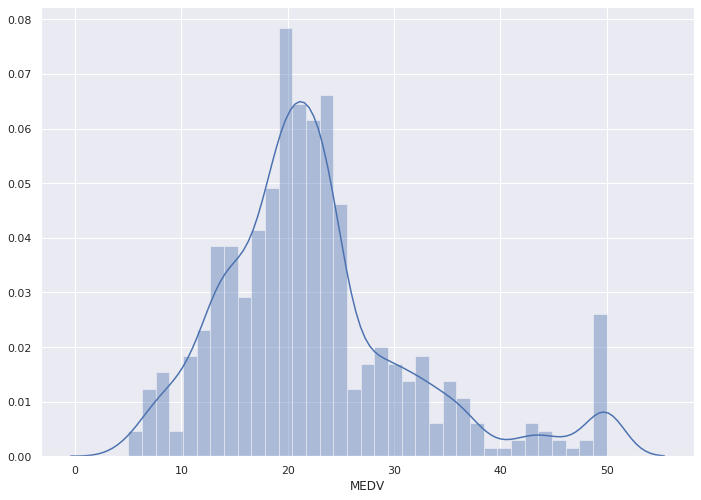

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=35)
plt.show()

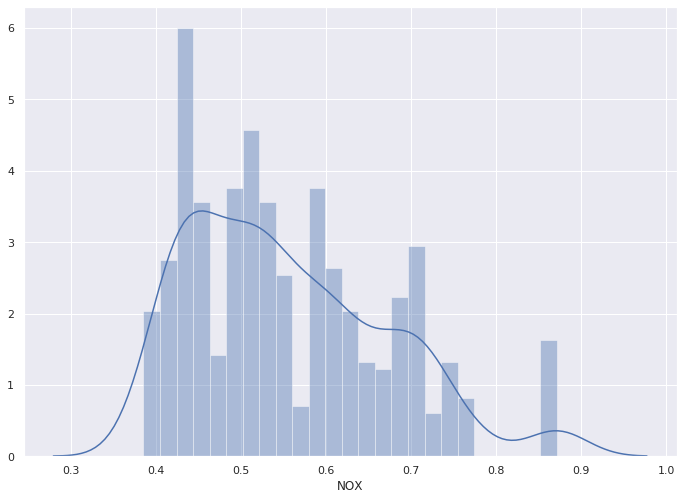

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['NOX'], bins=25)
plt.show()

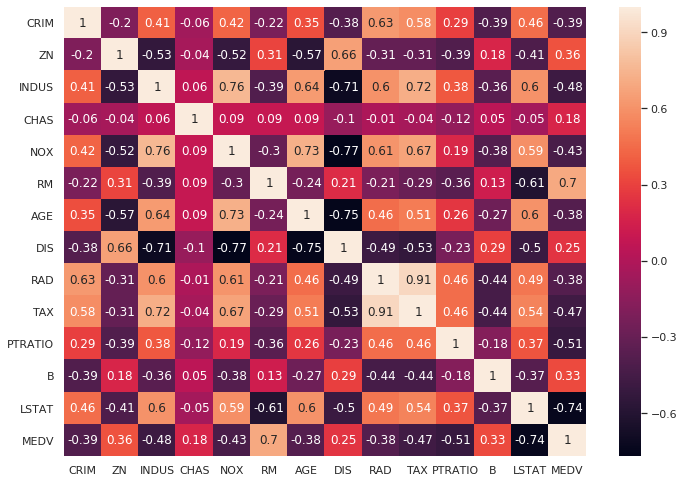

In [ ]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

No mapa podemos ver que a maior correlação com a variável MEDV é RM com 0.7. Enquanto que a maior correlação negativa é LSTAT com 0.74.

In [ ]:
y=boston['MEDV'].to_numpy()

In [ ]:
y=boston['NOX'].to_numpy()

In [ ]:
boston=boston.drop(['NOX'],axis=1)

Observamos a evolucao dda selecao dos atributos.




In [ ]:
data=boston.keys()
x=[]
for i in boston.keys():
    locals()[i]=boston[i].to_numpy()
    x.append((np.dot(eval(i),y))**2/(np.dot(eval(i),eval(i))*(np.dot(y,y))))
maxi=max(x)
index=x.index(maxi)
wk=data[index]#wk é uma list
print(wk)
v_til=boston.drop([wk],axis=1)#v_til é um panda
q1=eval(wk)/np.linalg.norm(eval(wk))
y_til=y-np.dot(eval(wk),y)*eval(wk)
d=proj([wk],v_til,y_til)

PTRATIO
['PTRATIO', 'RM']
['PTRATIO', 'RM', 'AGE']
['PTRATIO', 'RM', 'AGE', 'B']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS', 'TAX']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS', 'TAX', 'ZN']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS', 'TAX', 'ZN', 'INDUS']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS', 'TAX', 'ZN', 'INDUS', 'RAD']
['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS', 'TAX', 'ZN', 'INDUS', 'RAD', 'CRIM']


In [ ]:
def proj(w,v,y):
    x=[]
    w_til=0
    y_til=0
    #w=[w]
    if len(v)==0:
        print(w)
        return w
    for i in v.keys():
        #print(i)
        for j in range(len(w)):
            #print(w[j])
            #print(w)
            w_til=np.dot(eval(w[j]),eval(i))*eval(w[j])+w_til
            
        w_til=eval(i)-w_til    
        v[i]=w_til
        w_til=0
    for j in range(len(w)):
        y_til=np.dot(eval(w[j]),y)*eval(w[j])+y_til
    y=y-y_til
    for i in v.keys():
        locals()[i]=v[i].to_numpy()
        x.append((np.dot(eval(i),y))**2/(np.dot(eval(i),eval(i))*(np.dot(y,y))))  
    if len(x)!=0:    
        maxi=max(x)
        index=x.index(maxi)
        w.append(v.keys()[index])
        print(w)
        v=v.drop([v.keys()[index]],axis=1)
        #print(v.head())
        proj(w,v,y)
    #proj()

In [ ]:
w_til=CRIM-np.dot(q1,CRIM)*q1

In [ ]:
y_til=y-np.dot(y/np.linalg.norm(y),y)*(y/np.linalg.norm(y))

In [ ]:
boston['CRIM']=w_til

In [ ]:
import random
#sampling with replacement
#list = [20, 30, 40, 50 ,60, 70, 80]
#sampling = random.choices(list, k=7)
wk = ['RM', 'PTRATIO', 'B', 'NOX', 'DIS', 'CHAS', 'ZN', 'TAX', 'AGE', 'LSTAT', 'INDUS', 'RAD', 'CRIM']
sampling = random.sample(wk,len(wk))

In [ ]:
wk=['PTRATIO', 'RM', 'AGE', 'B', 'LSTAT', 'MEDV', 'DIS', 'CHAS', 'TAX', 'ZN', 'INDUS', 'RAD', 'CRIM']
sampling = random.sample(wk,len(wk))

In [ ]:
wk=sampling

In [ ]:
rmse=[]
teste=eval(wk[0])
for u in range(len(wk[1:])):
    
    teste=np.c_[teste,eval(wk[u+1])] 
    if u==0:
        print(teste)
    q,r= np.linalg.qr(teste)
    p = np.dot(q.T, y)
    x_til=np.dot(np.linalg.inv(r), p)
    pred=np.dot(teste,x_til)
    rmse.append(np.sqrt(np.mean((pred-y)**2)))

[[24.      4.09  ]
 [21.6     4.9671]
 [34.7     4.9671]
 ...
 [23.9     2.1675]
 [22.      2.3889]
 [11.9     2.505 ]]


In [ ]:
q,r= np.linalg.qr(teste)

In [ ]:
rmse3=rmse

Observa-se que o RMSE tende a miniur por volta do quarto atributo.


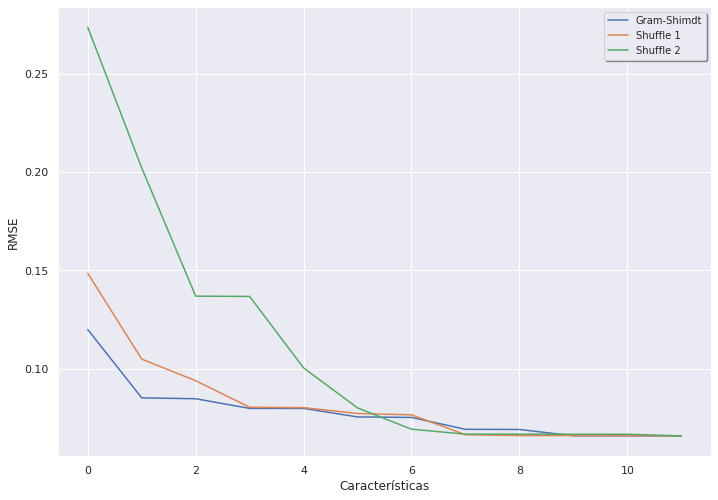

In [ ]:
fig, ax= plt.subplots()
ax.plot(rmse1,label='Gram-Shimdt')
ax.plot(rmse2,label='Shuffle 1')
ax.plot(rmse3,label='Shuffle 2')
plt.xlabel('Características')
plt.ylabel('RMSE')
legend = ax.legend(loc='best', shadow=True, fontsize='small')
#ax.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.show()

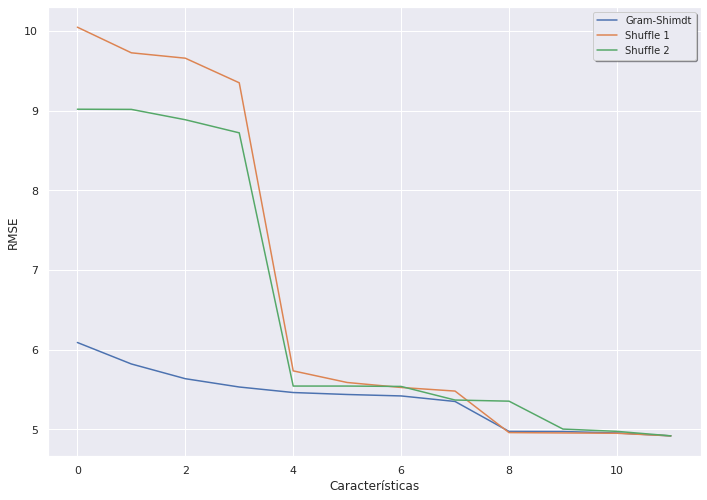

In [ ]:
fig, ax= plt.subplots()
ax.plot(rmse1,label='Gram-Shimdt')
ax.plot(rmse2,label='Shuffle 1')
ax.plot(rmse3,label='Shuffle 2')
plt.xlabel('Características')
plt.ylabel('RMSE')
legend = ax.legend(loc='best', shadow=True, fontsize='small')
#ax.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.show()

In [ ]:
p = np.dot(q.T, y)
x_til=np.dot(np.linalg.inv(r), p)

In [ ]:
pred=np.dot(teste,x_til)

In [ ]:
a = np.random.randn(9, 6)

Vamos agora representar por uma linha a regressão da principal caracterítica com o conjunto de dados.

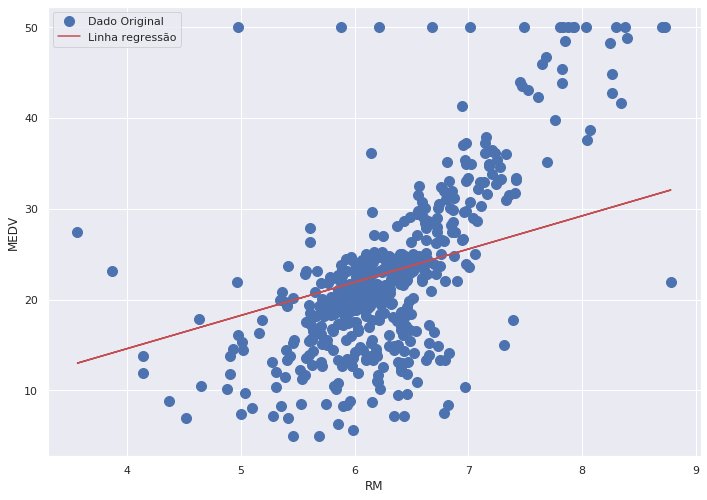

In [ ]:
_ = plt.plot(teste[:,0],y, 'o', label='Dado Original', markersize=10)
_ = plt.plot(teste[:,0], teste[:,0]*x_til, 'r', label='Linha regressão')
plt.xlabel('RM')
plt.ylabel('MEDV')
_ = plt.legend()
plt.show()

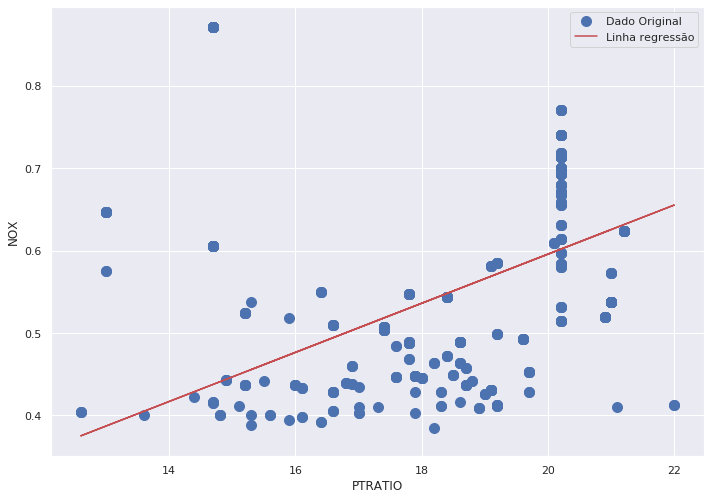

In [ ]:
_ = plt.plot(teste[:,0],y, 'o', label='Dado Original', markersize=10)
_ = plt.plot(teste[:,0], teste[:,0]*x_til, 'r', label='Linha regressão')
plt.xlabel('PTRATIO')
plt.ylabel('NOX')
_ = plt.legend()
plt.show()